In [1]:
pip install segyio

Defaulting to user installation because normal site-packages is not writeable
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 82 kB 904 kB/s  eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [12]:
# pip install segyio numpy matplotlib
import segyio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ==== ÈÖçÁΩÆ ====
SEGY_PATH = Path("MMT(2015)_sgy/X-9_20150928_132601_RAW_LF.sgy")   # ‚Üê Êç¢Êàê‰Ω†ÁöÑÊñá‰ª∂

# ==== ËØªÂèñÂü∫Á°Ä‰ø°ÊÅØ ====
with segyio.open(SEGY_PATH.as_posix(), "r", ignore_geometry=True) as f:
    n_traces = f.tracecount          # ÈÅìÊï∞
    ns = f.samples.size              # ÊØèÈÅìÈááÊ†∑ÁÇπÊï∞
    dt_us = segyio.tools.dt(f)       # ÈááÊ†∑Èó¥Èöî (ÂæÆÁßí)
    times_ms = np.arange(ns) * (dt_us / 1000.0)  # ÊØ´ÁßíÊó∂Èó¥ËΩ¥

    # ÂèñÁ¨¨‰∏ÄÈÅìÔºåÁîª‚ÄúÂçïÈÅìÊ≥¢ÂΩ¢‚Äù
    trace0 = f.trace[0].astype(np.float32)

# ---- Âõæ 1ÔºöÂçïÈÅìÊ≥¢ÂΩ¢Ôºàtime-amplitudeÔºâ----
plt.figure(figsize=(7, 4))
plt.plot(times_ms, trace0)
plt.gca().invert_xaxis()  # ÂèØÈÄâÔºö‰∏çÈúÄË¶ÅÂèØÂà†
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.title("First Trace")
plt.tight_layout()
plt.show()

# ==== ËØªÂèñ‰∏ÄÊÆµÂâñÈù¢ÔºàÊØîÂ¶ÇÂâç 500 ÈÅìÔºâ ====
n_show = min(500, n_traces)  # ÈÅìÊï∞Â§™Â§öÂÖàÊà™Âèñ‰∏Ä‰∫õÊù•ÊòæÁ§∫
section = np.empty((ns, n_show), dtype=np.float32)

with segyio.open(SEGY_PATH.as_posix(), "r", ignore_geometry=True) as f:
    for i in range(n_show):
        section[:, i] = f.trace[i].astype(np.float32)

# ÂèØÈÄâÔºöÂÅö‰∏Ä‰∏™ÁÆÄÂçïÂΩí‰∏ÄÂåñÔºåÊèêÂçáÂØπÊØîÂ∫¶
p99 = np.percentile(np.abs(section), 99)
if p99 > 0:
    section = np.clip(section / p99, -1, 1)

# ---- Âõæ 2ÔºöÂâñÈù¢ÂõæÔºàimshow Â±ïÁ§∫ time vs traceÔºâ----
plt.figure(figsize=(10, 6))
extent = [0, n_show, times_ms[-1], times_ms[0]]  # y ËΩ¥Âêë‰∏ãÂ¢ûÂä† ‚Üí È°∂ÈÉ®ÊòØ 0 ms
plt.imshow(section, aspect='auto', extent=extent)
plt.xlabel("Trace index")
plt.ylabel("Time (ms)")
plt.title("SEGY Section (first {} traces)".format(n_show))
plt.tight_layout()
plt.show()

# ---- È¢ùÂ§ñÔºöÂ¶ÇÊûú‰Ω†ÊÉ≥ÂÅö‚Äúwiggle‚ÄùÂè†Á∫øÂõæÔºàÂèØÈÄâÔºâ----
def wiggle_plot(sec, tms, skip=5, scale=1.0):
    """ÁÆÄÊòì wiggleÔºöÊØèÈöî skip ÈÅìÁîª‰∏ÄÊù°ÊäòÁ∫ø"""
    plt.figure(figsize=(10, 6))
    for i in range(0, sec.shape[1], skip):
        tr = sec[:, i] * scale
        plt.plot(i + tr, tms, linewidth=0.5)
        plt.fill_betweenx(tms, i, i + np.maximum(tr, 0), alpha=0.3)
    plt.gca().invert_yaxis()
    plt.xlabel("Trace index")
    plt.ylabel("Time (ms)")
    plt.title("Wiggle Plot (every {} traces)".format(skip))
    plt.tight_layout()
    plt.show()

# ‰ΩøÁî®Ôºöwiggle_plot(section, times_ms, skip=5, scale=0.5)

RuntimeError: trace count inconsistent with file size, trace lengths possibly of non-uniform

In [10]:
pip install obspy numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14.1 MB 686 kB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8.5 MB 15.9 MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 64 kB 23.5 MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8.4 MB 92.5 MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 129 kB 23.5 MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 207 kB 79.2 MB/s eta 0:00:01
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 70 kB 30.8 MB/s eta 0

Trace count: 3868


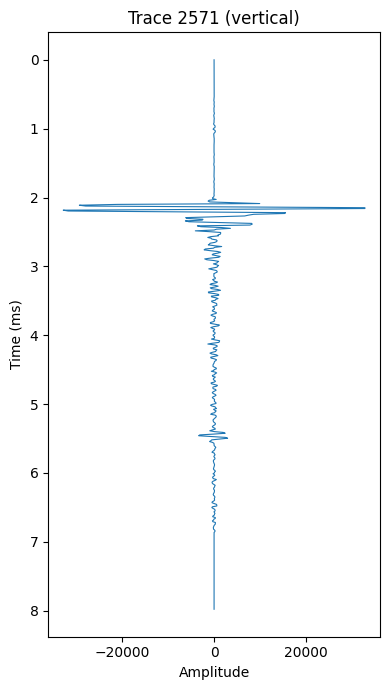

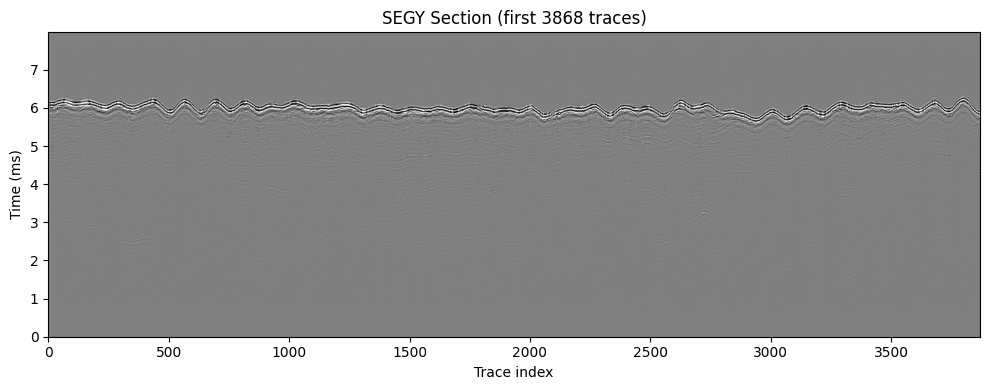

In [34]:
# pip install obspy numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt
from obspy.io.segy.segy import _read_segy

SEGY_PATH = "MMT(2015)_sgy/X-16_20150928_135009_RAW_LF.sgy"  # ÊîπÊàê‰Ω†ÁöÑË∑ØÂæÑ

sf = _read_segy(SEGY_PATH, headonly=False)
n_traces = len(sf.traces)
print("Trace count:", n_traces)

trace_index = 2570
n = 3868
# ---- ÂÆâÂÖ®Âú∞Ëé∑ÂèñÈááÊ†∑Èó¥Èöî dtÔºàÊØ´ÁßíÔºâ----
def get_dt_ms(segfile, fallback_ms=1.0):
    # 1) ‰∫åËøõÂà∂Êñá‰ª∂Â§¥ÔºàÊúÄÂ∏∏ËßÅÔºâ
    try:
        dt = segfile.binary_file_header.sample_interval_in_microseconds
        if dt and dt > 0:
            return dt / 1000.0
    except Exception:
        pass
    # 2) stats.deltaÔºàÊúâ‰∫õÊñá‰ª∂‰ºöÂ°´Ôºâ
    try:
        dt = segfile.traces[0].stats.delta  # Áßí
        if dt and dt > 0:
            return dt * 1000.0
    except Exception:
        pass
    # 3) ÂÖúÂ∫ïÔºöÁªô‰∏™ÂêàÁêÜÈªòËÆ§ÂÄºÔºà‰ªÖÁî®‰∫éÂùêÊ†áËΩ¥Ôºâ
    print(f"[WARN] No dt in headers; using fallback {fallback_ms} ms for plotting axis.")
    return fallback_ms

dt_ms = get_dt_ms(sf)

# ---- Âõæ1ÔºöÁ¨¨‰∏ÄÈÅìÔºàÁ´ñÁùÄÊòæÁ§∫Ôºâ----
   # ÊÉ≥ÁúãÁöÑ trace Âè∑Ôºà‰ªé 0 ÂºÄÂßãÔºâ
tr = sf.traces[trace_index].data.astype(np.float32)
t = np.arange(tr.size) * dt_ms

plt.figure(figsize=(4, 7))
plt.plot(tr, t, linewidth=0.8)
plt.gca().invert_yaxis()
plt.xlabel("Amplitude")
plt.ylabel("Time (ms)")
plt.title(f"Trace {trace_index+1} (vertical)")  # +1 ÊòæÁ§∫ÊàêËá™ÁÑ∂Êï∞ÁºñÂè∑
plt.tight_layout()
plt.show()

# ---- ÁªÑÂâñÈù¢ÔºöË°•ÈΩêÂèòÈïøÈÅìÂêéÊòæÁ§∫Ââç 500 ÈÅì ----
lengths = [tr.data.size for tr in sf.traces]
ns = max(lengths)
n_show = min(n, n_traces)
section = np.zeros((ns, n_show), dtype=np.float32)

for i in range(n_show):
    d = sf.traces[i].data.astype(np.float32)
    section[:d.size, i] = d  # ‰∏çË∂≥Ë°•0

times_ms = np.arange(ns) * dt_ms

# ÁÆÄÂçïÂΩí‰∏ÄÂåñ
p99 = np.percentile(np.abs(section), 99)
if p99 > 0:
    section = np.clip(section / p99, -1, 1)

plt.figure(figsize=(10, 4))
extent = [0, n_show, 0, times_ms[-1]]  # ‰∏ä0msÔºå‰∏ãÊõ¥Â§ß
plt.imshow(section, aspect='auto', extent=extent, cmap="gray")
plt.xlabel("Trace index")
plt.ylabel("Time (ms)")
plt.title(f"SEGY Section (first {n_show} traces)")
plt.tight_layout()
plt.show()

Trace count: 3868


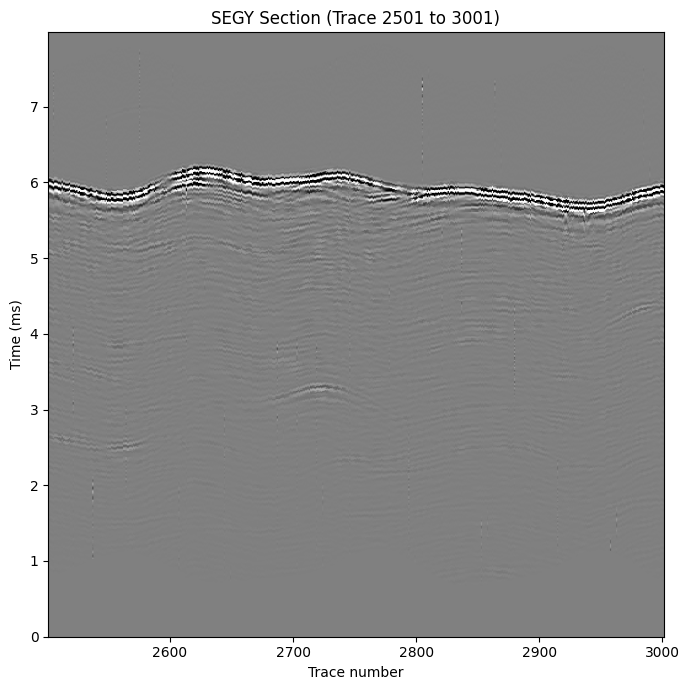

In [42]:
# pip install obspy numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt
from obspy.io.segy.segy import _read_segy

SEGY_PATH = "MMT(2015)_sgy/X-16_20150928_135009_RAW_LF.sgy"  # ÊîπÊàê‰Ω†ÁöÑË∑ØÂæÑ

sf = _read_segy(SEGY_PATH, headonly=False)
n_traces = len(sf.traces)
print("Trace count:", n_traces)

# ---- ÂÆâÂÖ®Âú∞Ëé∑ÂèñÈááÊ†∑Èó¥Èöî dtÔºàÊØ´ÁßíÔºâ----
def get_dt_ms(segfile, fallback_ms=1.0):
    try:
        dt = segfile.binary_file_header.sample_interval_in_microseconds
        if dt and dt > 0:
            return dt / 1000.0
    except: pass
    try:
        dt = segfile.traces[0].stats.delta  # s
        if dt and dt > 0:
            return dt * 1000.0
    except: pass
    print(f"[WARN] No dt in headers; using fallback {fallback_ms} ms for plotting axis.")
    return fallback_ms

dt_ms = get_dt_ms(sf)

# ---- ËÆæÁΩÆ trace ËåÉÂõ¥ ----
start_trace = 2500   # Ëµ∑Âßã trace ÁºñÂè∑Ôºà‰ªé 0 ÂºÄÂßãÔºâ
end_trace   = 3000   # ÁªìÊùü trace ÁºñÂè∑Ôºà‰ªé 0 ÂºÄÂßãÔºåÂåÖÂê´ÂÆÉÔºâ
trace_range = range(start_trace, min(end_trace+1, n_traces))
n_show = len(trace_range)

# ---- ËÆ°ÁÆóÊúÄÂ§ßÈááÊ†∑ÁÇπÊï∞ÔºåÁî®Êù•Ë°•ÈΩê ----
lengths = [sf.traces[i].data.size for i in trace_range]
ns = max(lengths)
section = np.zeros((ns, n_show), dtype=np.float32)

for j, idx in enumerate(trace_range):
    d = sf.traces[idx].data.astype(np.float32)
    section[:d.size, j] = d  # ‰∏çË∂≥Ë°• 0

times_ms = np.arange(ns) * dt_ms

# ÁÆÄÂçïÂΩí‰∏ÄÂåñÔºà‰∏∫‰∫ÜÊòæÁ§∫ÊïàÊûúÔºâ
p99 = np.percentile(np.abs(section), 99)
if p99 > 0:
    section = np.clip(section / p99, -1, 1)

# ---- ÁîªÂâñÈù¢ ----
plt.figure(figsize=(7, 7))
extent = [start_trace+1, end_trace+1, 0, times_ms[-1]]  # Ê®™ÂùêÊ†áÁî®ÁúüÂÆû trace number
plt.imshow(section, aspect='auto', extent=extent, cmap="gray")
plt.xlabel("Trace number")
plt.ylabel("Time (ms)")
plt.title(f"SEGY Section (Trace {start_trace+1} to {end_trace+1})")
plt.tight_layout()
plt.show()

Trace count: 3868


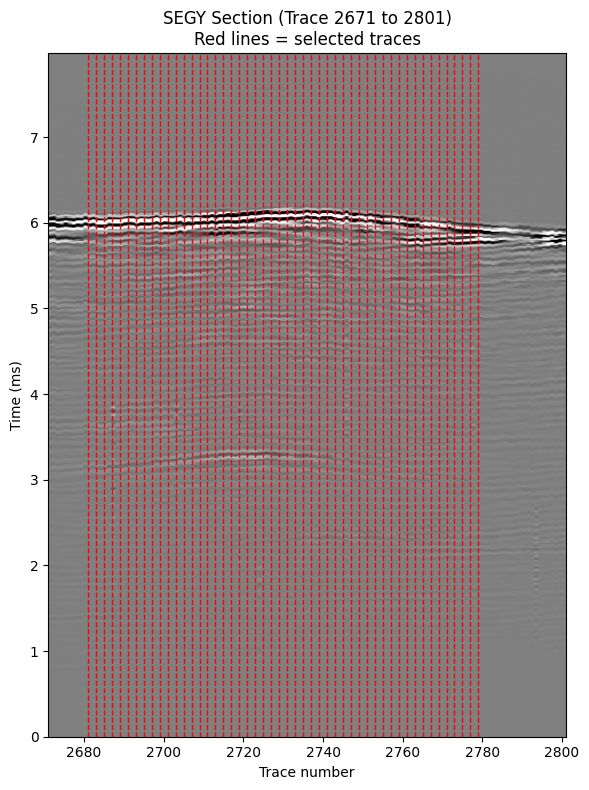

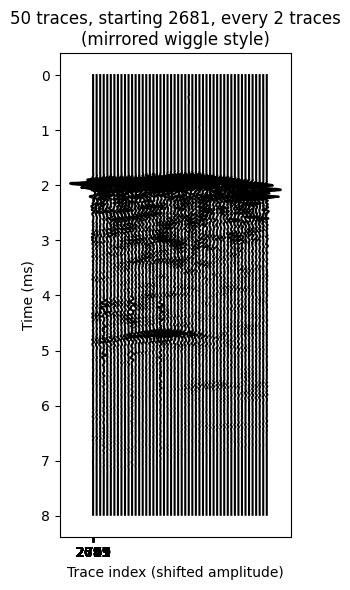

In [101]:
# pip install obspy numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt
from obspy.io.segy.segy import _read_segy

SEGY_PATH = "MMT(2015)_sgy/X-16_20150928_135009_RAW_LF.sgy"  # ÊîπÊàê‰Ω†ÁöÑË∑ØÂæÑ
sf = _read_segy(SEGY_PATH, headonly=False)
n_traces = len(sf.traces)
print("Trace count:", n_traces)

# ---- Ëé∑ÂèñÈááÊ†∑Èó¥Èöî dtÔºàÊØ´ÁßíÔºâ----
def get_dt_ms(segfile, fallback_ms=1.0):
    try:
        dt = segfile.binary_file_header.sample_interval_in_microseconds
        if dt and dt > 0:
            return dt / 1000.0
    except: pass
    try:
        dt = segfile.traces[0].stats.delta  # s
        if dt and dt > 0:
            return dt * 1000.0
    except: pass
    print(f"[WARN] No dt in headers; using fallback {fallback_ms} ms.")
    return fallback_ms

dt_ms = get_dt_ms(sf)

# ---- Â§ßÂâñÈù¢ËåÉÂõ¥ ----
start_trace = 2670
end_trace   = 2800
trace_range = range(start_trace, min(end_trace+1, n_traces))
n_show = len(trace_range)

# ËÆ°ÁÆóÊúÄÂ§ßÈááÊ†∑ÁÇπÊï∞
lengths = [sf.traces[i].data.size for i in trace_range]
ns = max(lengths)
section = np.zeros((ns, n_show), dtype=np.float32)

for j, idx in enumerate(trace_range):
    d = sf.traces[idx].data.astype(np.float32)
    section[:d.size, j] = d

times_ms = np.arange(ns) * dt_ms

# ÂΩí‰∏ÄÂåñ
p99 = np.percentile(np.abs(section), 99)
if p99 > 0:
    section = np.clip(section / p99, -1, 1)

# ---- ËÆæÁΩÆÂçïÈÅìÊ≥¢ÂΩ¢ÂèÇÊï∞ ----
trace_start = 2680   # Ëµ∑Âßã trace
step = 2           # Èó¥Èöî
n_waveforms = 50     # ÊÄªÂÖ±ÁîªÂ§öÂ∞ëÊù°
trace_indices = [trace_start + i*step for i in range(n_waveforms)]

# ---- ÂâñÈù¢ + Á∫¢Á∫ø ----
plt.figure(figsize=(6, 8))
extent = [start_trace+1, end_trace+1, 0, times_ms[-1]]
plt.imshow(section, aspect='auto', extent=extent, cmap="gray")
for idx in trace_indices:
    if idx < n_traces:
        plt.axvline(idx+1, color='red', linestyle='--', linewidth=1)
plt.xlabel("Trace number")
plt.ylabel("Time (ms)")
plt.title(f"SEGY Section (Trace {start_trace+1} to {end_trace+1})\nRed lines = selected traces")
plt.tight_layout()
plt.show()

# ---- ÂçïÈÅìÁ´ñÁõ¥Ê≥¢ÂΩ¢ (‰∏ÄË°å10Âàó) ----
plt.figure(figsize=(3, 6))

for k, idx in enumerate(trace_indices):
    if idx >= n_traces:
        continue
    tr = sf.traces[idx].data.astype(np.float32)
    t = np.arange(tr.size) * dt_ms
    plt.plot(-(tr) + k*5000, t, color="black")
plt.xticks(
    ticks=range(len(trace_indices)), 
    labels=[idx+1 for idx in trace_indices]  # trace ÁºñÂè∑
)
plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()   # üëà Âä†Ëøô‰∏ÄË°åÔºåÊ≤øxËΩ¥ÂØπÁß∞

plt.xlabel("Trace index (shifted amplitude)")
plt.ylabel("Time (ms)")
plt.title(f"{n_waveforms} traces, starting {trace_start+1}, every {step} traces\n(mirrored wiggle style)")
plt.tight_layout()
plt.show()



Trace count: 3231


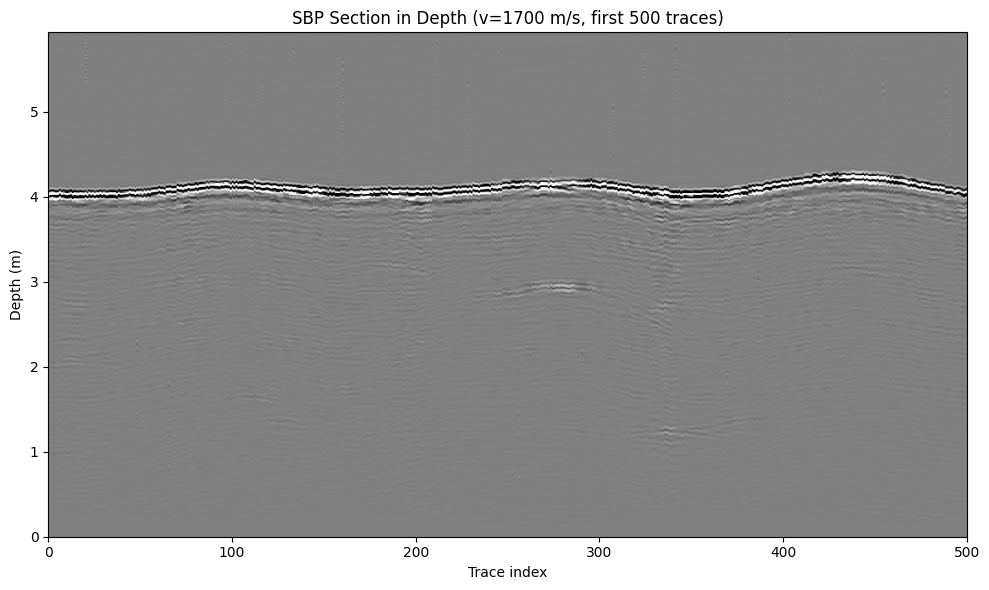

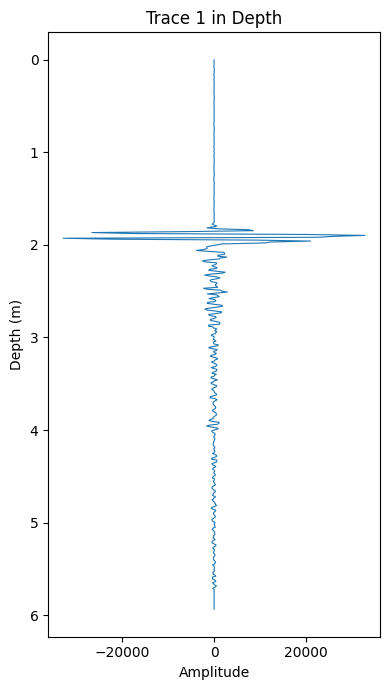

In [26]:
# pip install obspy numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt
from obspy.io.segy.segy import _read_segy

SEGY_PATH = "MMT(2015)_sgy/X-10_20150928_132907_RAW_LF.sgy"   # ÊîπÊàê‰Ω†ÁöÑÊñá‰ª∂Ë∑ØÂæÑ
VEL_MS = 1700.0                  # ÂÅáÂÆöÂ£∞ÈÄü (m/s)Ôºå‰æãÂ¶ÇÊµ∑Ê∞¥/ÊµÖÂ±ÇÊ≤âÁßØÁâ©
MAX_TRACES_TO_SHOW = 500         # ÊúÄÂ§öÊòæÁ§∫Â§öÂ∞ëÈÅì

# ËØªÂèñ SEG-YÔºàObsPy ÂÆπÈîôÂ•ΩÔºåÈÄÇÂêà SBP/ChirpÔºâ
sf = _read_segy(SEGY_PATH, headonly=False)
n_traces = len(sf.traces)
print("Trace count:", n_traces)

# ---- ÈááÊ†∑Èó¥Èöî dtÔºàÊØ´ÁßíÔºâÔºåÊåâ‰∫åËøõÂà∂Â§¥/trace.stats/ÂõûÈÄÄÈ°∫Â∫èËé∑Âèñ ----
def get_dt_ms(segfile, fallback_ms=1.0):
    try:
        dt = segfile.binary_file_header.sample_interval_in_microseconds
        if dt and dt > 0:
            return dt / 1000.0
    except: pass
    try:
        dt = segfile.traces[0].stats.delta  # s
        if dt and dt > 0:
            return dt * 1000.0
    except: pass
    print(f"[WARN] No dt in header; using fallback {fallback_ms} ms for axis.")
    return fallback_ms

dt_ms = get_dt_ms(sf)

# ---- ÁªÑÂâñÈù¢ÔºöÊääÂèòÈïøÈÅìË°•Èõ∂Âà∞Âêå‰∏ÄÈïøÂ∫¶ ----
lengths = [tr.data.size for tr in sf.traces]
ns = max(lengths)
n_show = min(MAX_TRACES_TO_SHOW, n_traces)
section = np.zeros((ns, n_show), dtype=np.float32)
for i in range(n_show):
    d = sf.traces[i].data.astype(np.float32)
    section[:d.size, i] = d  # ‰∏çË∂≥ÈÉ®ÂàÜË°•0

# ---- Êó∂Èó¥ËΩ¥(ms) ‚Üí Ê∑±Â∫¶ËΩ¥(m)Ôºö z = v * t / 2 ----
times_ms = np.arange(ns) * dt_ms
times_s  = times_ms / 1000.0
depth_m  = 0.5 * VEL_MS * times_s  # Ê∑±Â∫¶Êï∞ÁªÑÔºå‰∏éÊØè‰∏ÄË°åÂØπÂ∫î

# ---- ÁÆÄÂçïÂΩí‰∏ÄÂåñ‰æø‰∫éÊòæÁ§∫ÔºàÂèØÈÄâÔºâ----
p99 = np.percentile(np.abs(section), 99)
if p99 > 0:
    section = np.clip(section / p99, -1, 1)

# ---- ÁîªÂâñÈù¢ÔºöÁ∫µËΩ¥Êîπ‰∏∫Ê∑±Â∫¶(m)Ôºå‰∏ä0„ÄÅ‰∏ãÊõ¥Â§ß ----
plt.figure(figsize=(10, 6))
extent = [0, n_show, 0.0, float(depth_m[-1])]  # yËΩ¥‰ªé0Âà∞ÊúÄÂ§ßÊ∑±Â∫¶
plt.imshow(section, aspect='auto', extent=extent, cmap="gray")
plt.xlabel("Trace index")
plt.ylabel("Depth (m)")
plt.title(f"SBP Section in Depth (v={VEL_MS:.0f} m/s, first {n_show} traces)")
plt.tight_layout()
plt.show()

# ---- ÊÉ≥ÁúãÊüê‰∏ÄÊù°ÈÅìÔºàÁ´ñÁùÄÔºâ‰πüÁî®Ê∑±Â∫¶ËΩ¥ ----
trace_index = 0  # ÊîπÊàê‰Ω†ÊÉ≥ÁúãÁöÑÈÅìÂè∑Ôºà‰ªé0ÂºÄÂßãÔºâ
tr = sf.traces[trace_index].data.astype(np.float32)
z = depth_m[:tr.size]
plt.figure(figsize=(4, 7))
plt.plot(tr, z, linewidth=0.8)
plt.gca().invert_yaxis()  # ‰∏äÊµÖ‰∏ãÊ∑±
plt.xlabel("Amplitude")
plt.ylabel("Depth (m)")
plt.title(f"Trace {trace_index+1} in Depth")
plt.tight_layout()
plt.show()